In [1]:
import warnings
import numpy as np
import pandas as pd
import tqdm

# Ignore warnings
warnings.filterwarnings("ignore")

# Add other imports as needed
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [16]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Hotel Reservations.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [18]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [19]:
df['type_of_meal_plan'].value_counts()

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


In [20]:
# Dropping the 'Booking_ID' column
df.drop(columns=['Booking_ID'], inplace=True)

In [21]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [22]:
# Count the frequency of each category in the 'type_of_meal_plan' column
counts = df['type_of_meal_plan'].value_counts()

# Set a threshold for the minimum count
min_count_threshold = 1000

# Filter out labels with counts less than the threshold
filtered_labels = counts[counts >= min_count_threshold].index

# Filter the DataFrame based on the filtered labels
filtered_df = df[df['type_of_meal_plan'].isin(filtered_labels)]


In [23]:
filtered_df['type_of_meal_plan'].value_counts()

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305


In [24]:
filtered_df['booking_status'].value_counts()

,count
booking_status,
Not_Canceled,24386
Canceled,11884


In [25]:
df2=filtered_df.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables to numeric using LabelEncoder
for col in filtered_df.columns:
    if filtered_df[col].dtype == 'object':
        filtered_df[col] = label_encoder.fit_transform(filtered_df[col])

# Check the converted DataFrame
filtered_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,2,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,2,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [27]:

X=filtered_df.drop(['booking_status'],axis=1)
y=filtered_df['booking_status']

# Assuming X contains features and y contains target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
y_train.value_counts()

,count
booking_status,
1,19520
0,9496


Training and evaluating Random Forest...
Calculating permutation importance for Random Forest...


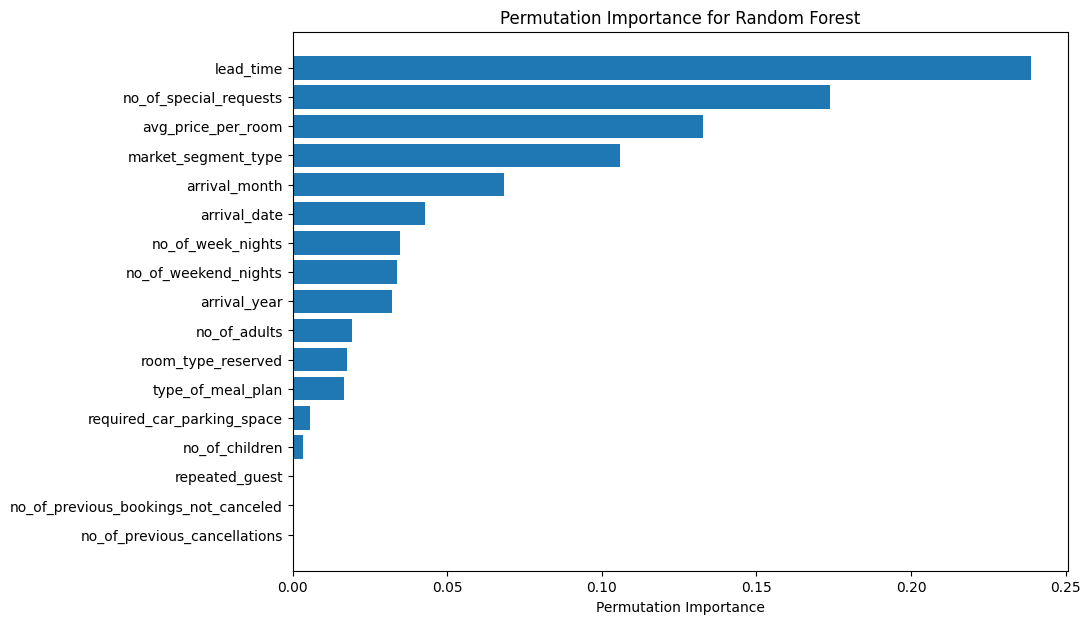

Performing Cross-Validation for Random Forest...
Mean cross-validation score for Random Forest: 0.9023986765922251
Calculating ROC AUC for Random Forest...


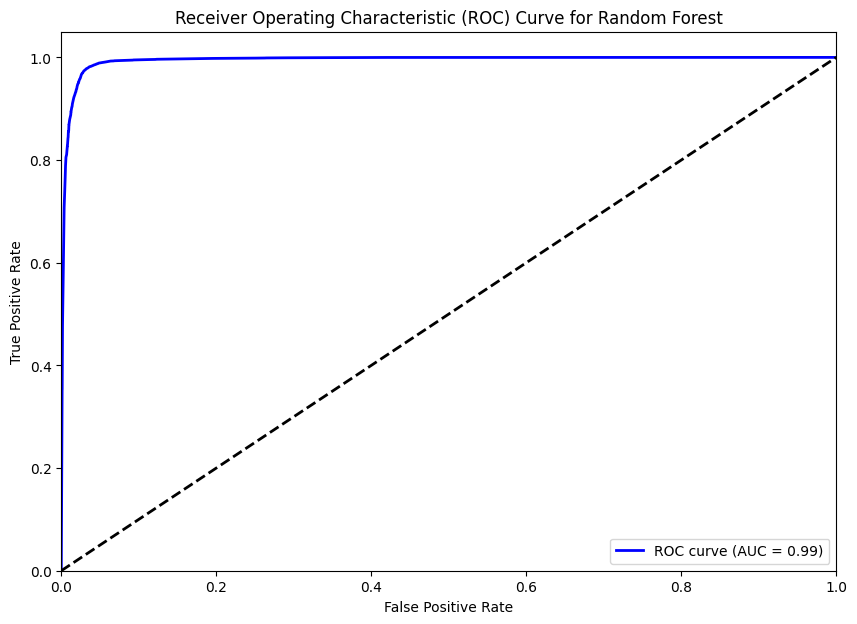

Calculating confusion matrix for Random Forest...


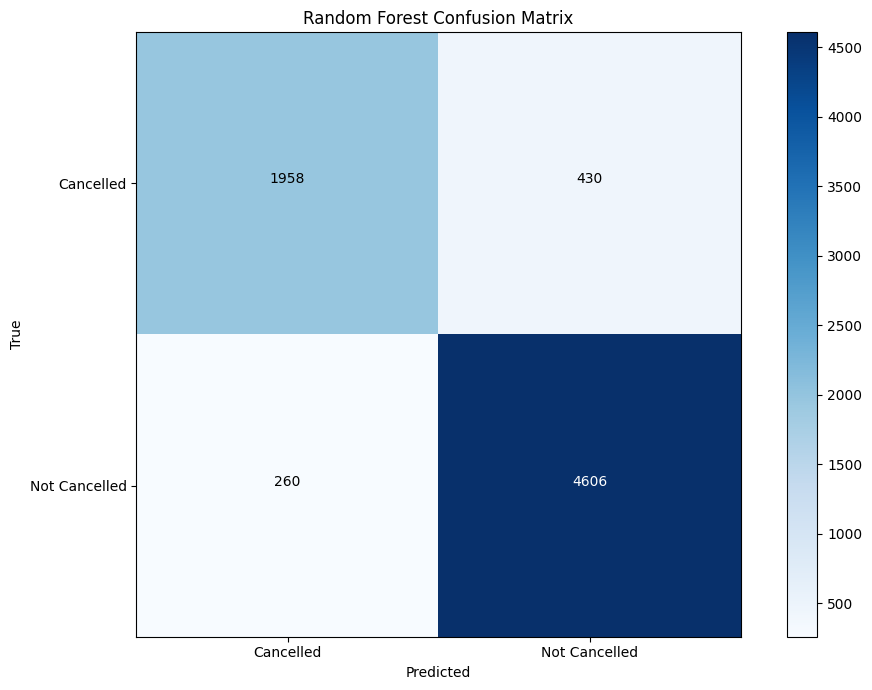

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.inspection import permutation_importance

# Random Forest
print("Training and evaluating Random Forest...")

# Initialize model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train, y_train)

# Evaluate with permutation importance
print("Calculating permutation importance for Random Forest...")
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(10, 7))
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), np.array(X.columns)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Random Forest')
plt.show()

# Evaluate with cross-validation
print("Performing Cross-Validation for Random Forest...")
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)  # Change cv value for different fold sizes
print("Mean cross-validation score for Random Forest:", np.mean(rf_cv_scores))

# Evaluate ROC AUC
print("Calculating ROC AUC for Random Forest...")
rf_probs = rf_model.predict_proba(X)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC AUC curve
plt.figure(figsize=(10, 7))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
print("Calculating confusion matrix for Random Forest...")
rf_conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(rf_conf_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Set ticks
class_labels = ['Cancelled', 'Not Cancelled']  # Adjust according to your class labels
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add annotations
thresh = rf_conf_matrix.max() / 2.
for i in range(rf_conf_matrix.shape[0]):
    for j in range(rf_conf_matrix.shape[1]):
        plt.text(j, i, format(rf_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if rf_conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()


Training and evaluating XGBoost...
Calculating permutation importance for XGBoost...


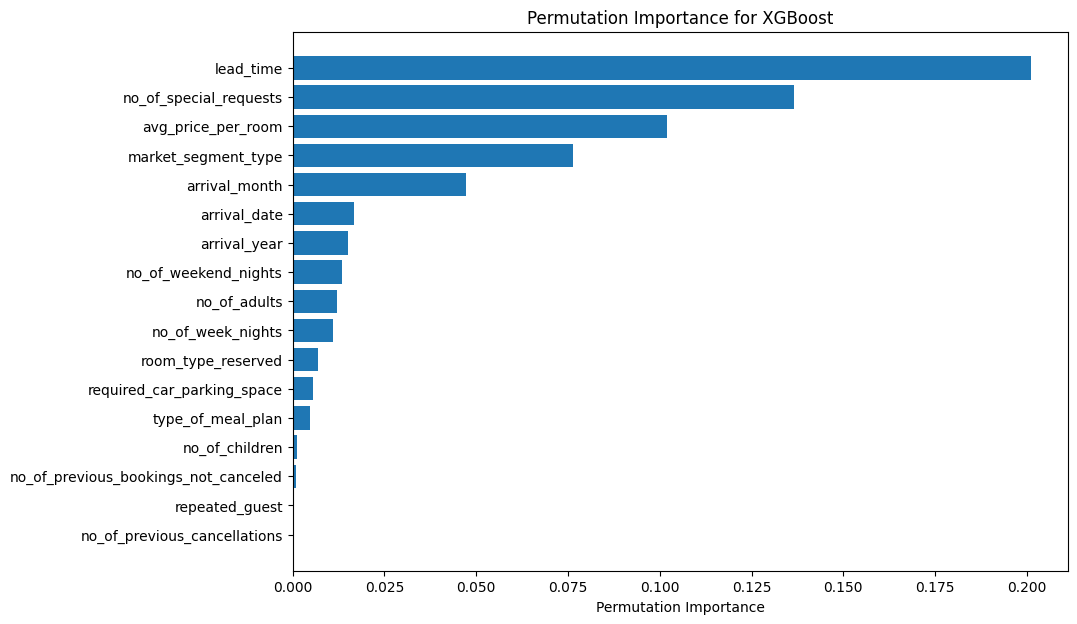

Performing Cross-Validation for XGBoost...
Mean cross-validation score for XGBoost: 0.89200441135925
Calculating ROC AUC for XGBoost...


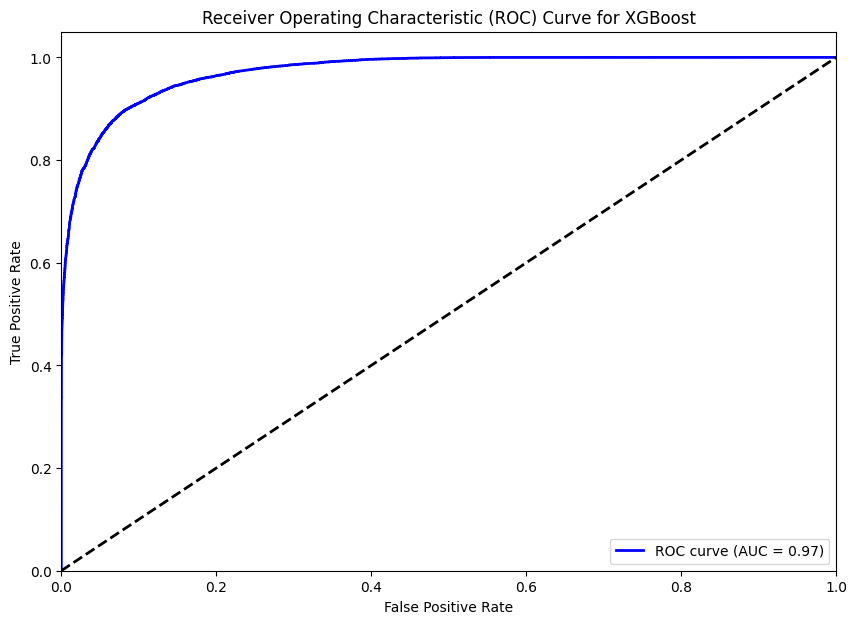

Calculating confusion matrix for XGBoost...


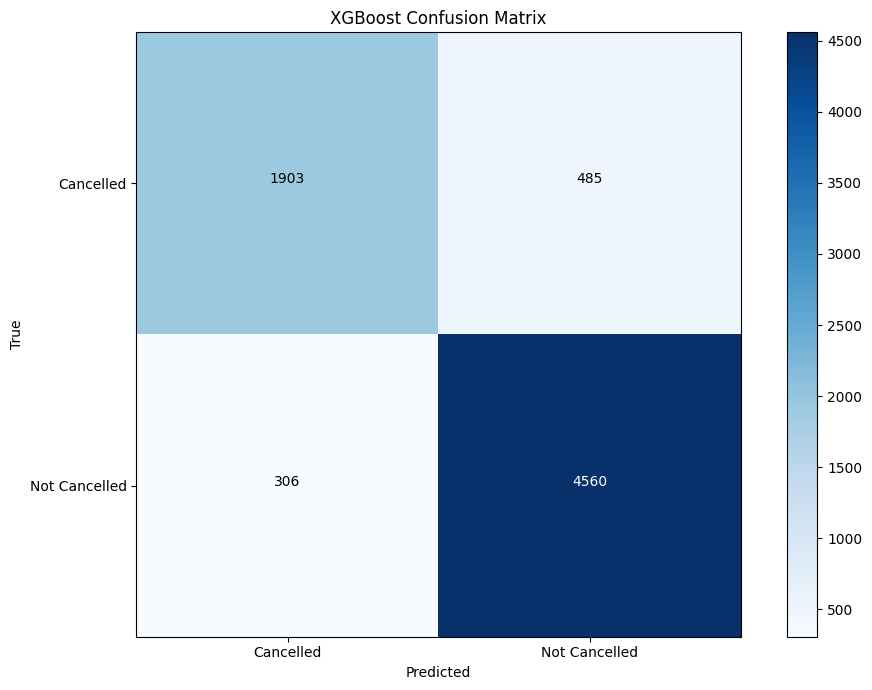

In [31]:
from xgboost import XGBClassifier

# XGBoost
print("Training and evaluating XGBoost...")

# Initialize model
xgb_model = XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Evaluate with permutation importance
print("Calculating permutation importance for XGBoost...")
perm_importance_xgb = permutation_importance(xgb_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx_xgb = perm_importance_xgb.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(10, 7))
plt.barh(range(X.shape[1]), perm_importance_xgb.importances_mean[sorted_idx_xgb], align='center')
plt.yticks(range(X.shape[1]), np.array(X.columns)[sorted_idx_xgb])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for XGBoost')
plt.show()

# Evaluate with cross-validation
print("Performing Cross-Validation for XGBoost...")
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5)  # Change cv value for different fold sizes
print("Mean cross-validation score for XGBoost:", np.mean(xgb_cv_scores))

# Evaluate ROC AUC
print("Calculating ROC AUC for XGBoost...")
xgb_probs = xgb_model.predict_proba(X)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y, xgb_probs)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC AUC curve
plt.figure(figsize=(10, 7))
plt.plot(xgb_fpr, xgb_tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
print("Calculating confusion matrix for XGBoost...")
xgb_conf_matrix = confusion_matrix(y_test, xgb_model.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(xgb_conf_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Set ticks
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add annotations
thresh = xgb_conf_matrix.max() / 2.
for i in range(xgb_conf_matrix.shape[0]):
    for j in range(xgb_conf_matrix.shape[1]):
        plt.text(j, i, format(xgb_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if xgb_conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 19520, number of negative: 9496
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 29016, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672732 -> initscore=0.720569
[LightGBM] [Info] Start training from score 0.720569
Calculating permutation importance for LightGBM...


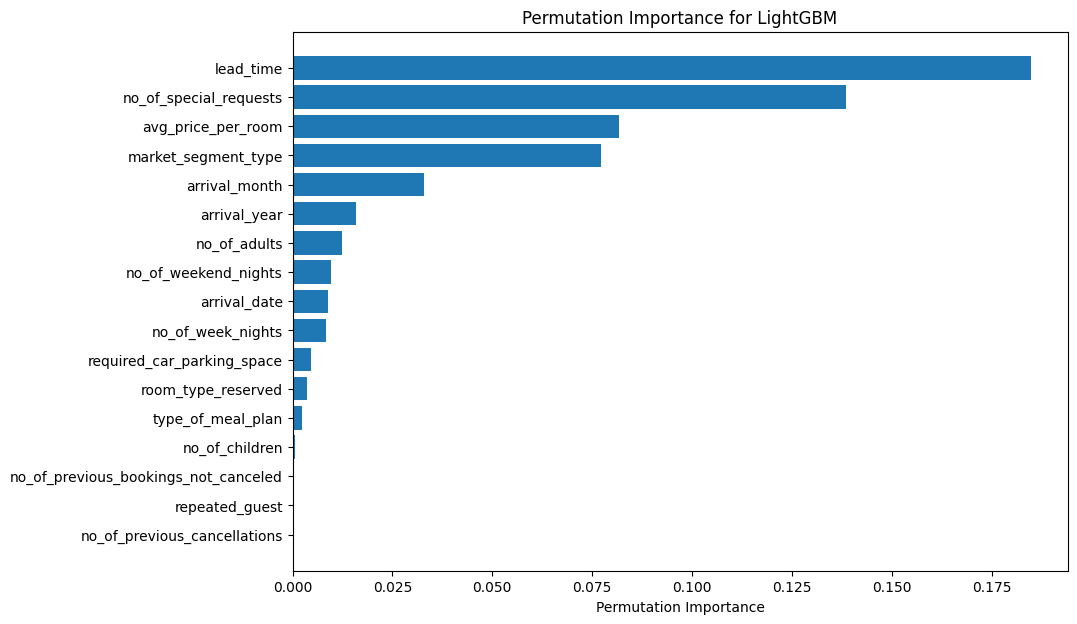

Performing Cross-Validation for LightGBM...
[LightGBM] [Info] Number of positive: 19508, number of negative: 9508
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 29016, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672319 -> initscore=0.718691
[LightGBM] [Info] Start training from score 0.718691
[LightGBM] [Info] Number of positive: 19509, number of negative: 9507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 29016, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: p

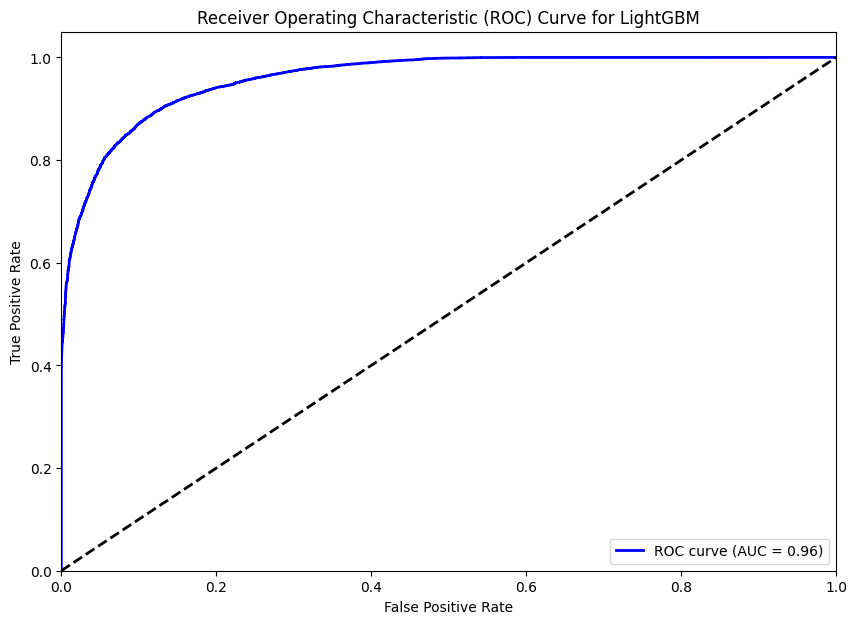

Calculating confusion matrix for LightGBM...


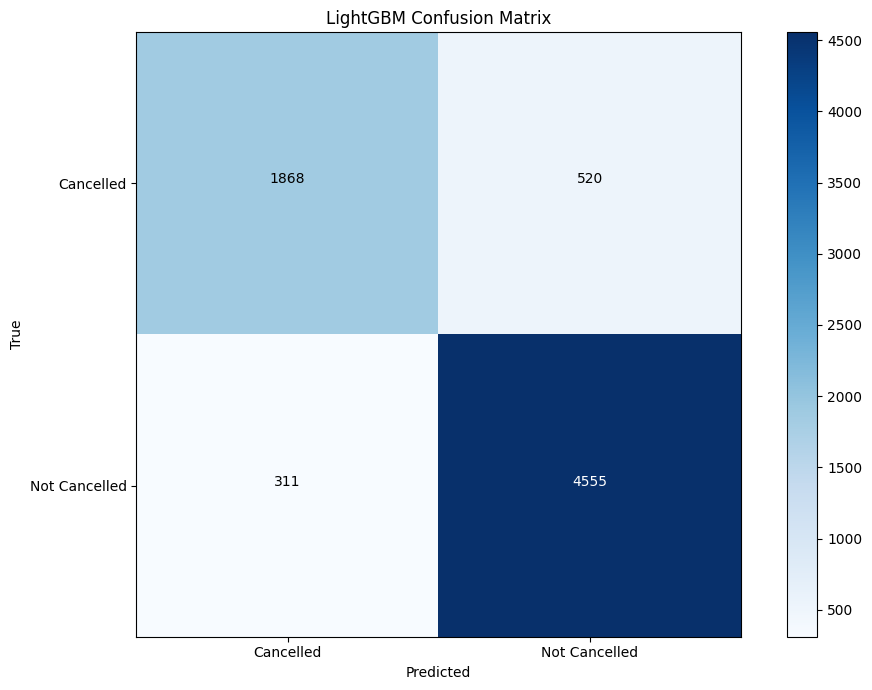

In [32]:
from lightgbm import LGBMClassifier

# LightGBM
print("Training and evaluating LightGBM...")

# Initialize model
lgbm_model = LGBMClassifier()

# Fit the model
lgbm_model.fit(X_train, y_train)

# Evaluate with permutation importance
print("Calculating permutation importance for LightGBM...")
perm_importance_lgbm = permutation_importance(lgbm_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx_lgbm = perm_importance_lgbm.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(10, 7))
plt.barh(range(X.shape[1]), perm_importance_lgbm.importances_mean[sorted_idx_lgbm], align='center')
plt.yticks(range(X.shape[1]), np.array(X.columns)[sorted_idx_lgbm])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for LightGBM')
plt.show()

# Evaluate with cross-validation
print("Performing Cross-Validation for LightGBM...")
lgbm_cv_scores = cross_val_score(lgbm_model, X, y, cv=5)  # Change cv value for different fold sizes
print("Mean cross-validation score for LightGBM:", np.mean(lgbm_cv_scores))

# Evaluate ROC AUC
print("Calculating ROC AUC for LightGBM...")
lgbm_probs = lgbm_model.predict_proba(X)[:, 1]
lgbm_fpr, lgbm_tpr, _ = roc_curve(y, lgbm_probs)
lgbm_roc_auc = auc(lgbm_fpr, lgbm_tpr)

# Plot ROC AUC curve
plt.figure(figsize=(10, 7))
plt.plot(lgbm_fpr, lgbm_tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
print("Calculating confusion matrix for LightGBM...")
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_model.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(lgbm_conf_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Set ticks
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add annotations
thresh = lgbm_conf_matrix.max() / 2.
for i in range(lgbm_conf_matrix.shape[0]):
    for j in range(lgbm_conf_matrix.shape[1]):
        plt.text(j, i, format(lgbm_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if lgbm_conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LightGBM Confusion Matrix')
plt.tight_layout()
plt.show()

Training and evaluating Neural Network...
Calculating permutation importance for Neural Network...


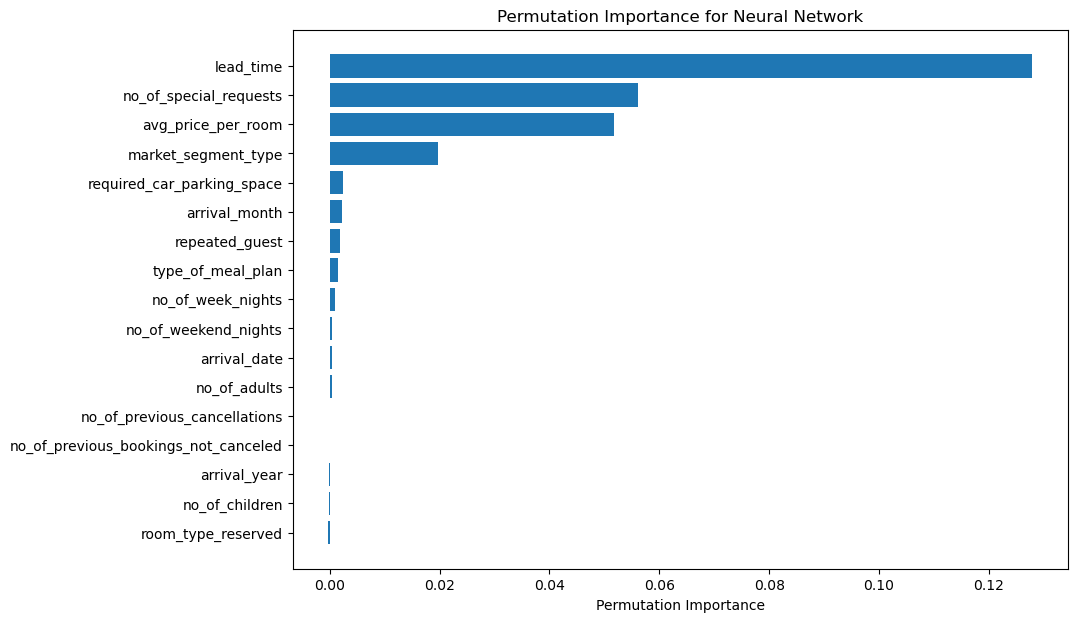

Performing Cross-Validation for Neural Network...
Mean cross-validation score for Neural Network: 0.7823545629997243
Calculating ROC AUC for Neural Network...


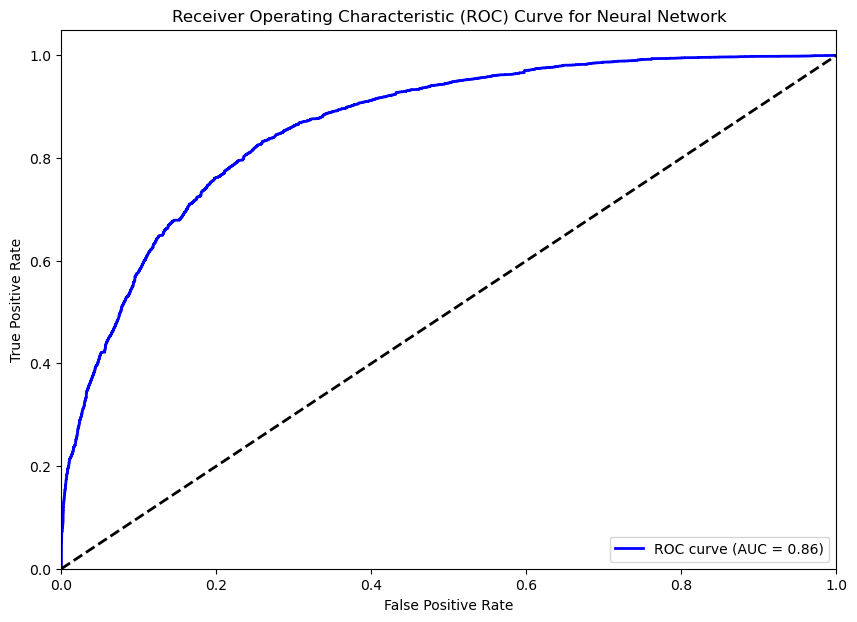

Calculating confusion matrix for Neural Network...


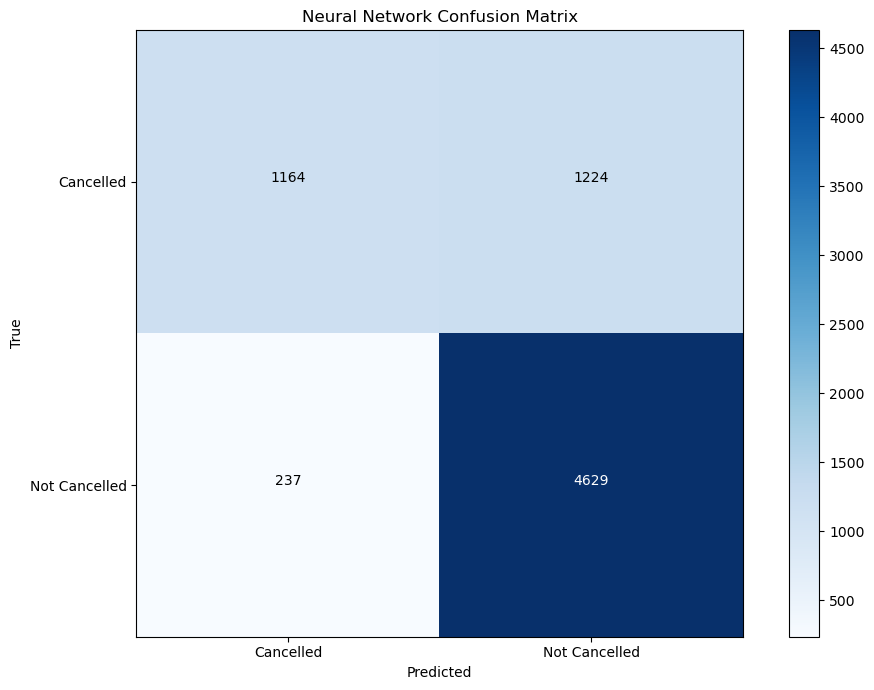

In [ ]:
from sklearn.neural_network import MLPClassifier

# Neural Network
print("Training and evaluating Neural Network...")

# Initialize model
nn_model = MLPClassifier(max_iter=1000)

# Fit the model
nn_model.fit(X_train, y_train)

# Evaluate with permutation importance
print("Calculating permutation importance for Neural Network...")
perm_importance_nn = permutation_importance(nn_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx_nn = perm_importance_nn.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(10, 7))
plt.barh(range(X.shape[1]), perm_importance_nn.importances_mean[sorted_idx_nn], align='center')
plt.yticks(range(X.shape[1]), np.array(X.columns)[sorted_idx_nn])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Neural Network')
plt.show()

# Evaluate with cross-validation
print("Performing Cross-Validation for Neural Network...")
nn_cv_scores = cross_val_score(nn_model, X, y, cv=5)  # Change cv value for different fold sizes
print("Mean cross-validation score for Neural Network:", np.mean(nn_cv_scores))

# Evaluate ROC AUC
print("Calculating ROC AUC for Neural Network...")
nn_probs = nn_model.predict_proba(X)[:, 1]
nn_fpr, nn_tpr, _ = roc_curve(y, nn_probs)
nn_roc_auc = auc(nn_fpr, nn_tpr)

# Plot ROC AUC curve
plt.figure(figsize=(10, 7))
plt.plot(nn_fpr, nn_tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
print("Calculating confusion matrix for Neural Network...")
nn_conf_matrix = confusion_matrix(y_test, nn_model.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(nn_conf_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Set ticks
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add annotations
thresh = nn_conf_matrix.max() / 2.
for i in range(nn_conf_matrix.shape[0]):
    for j in range(nn_conf_matrix.shape[1]):
        plt.text(j, i, format(nn_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if nn_conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Neural Network Confusion Matrix')
plt.tight_layout()
plt.show()


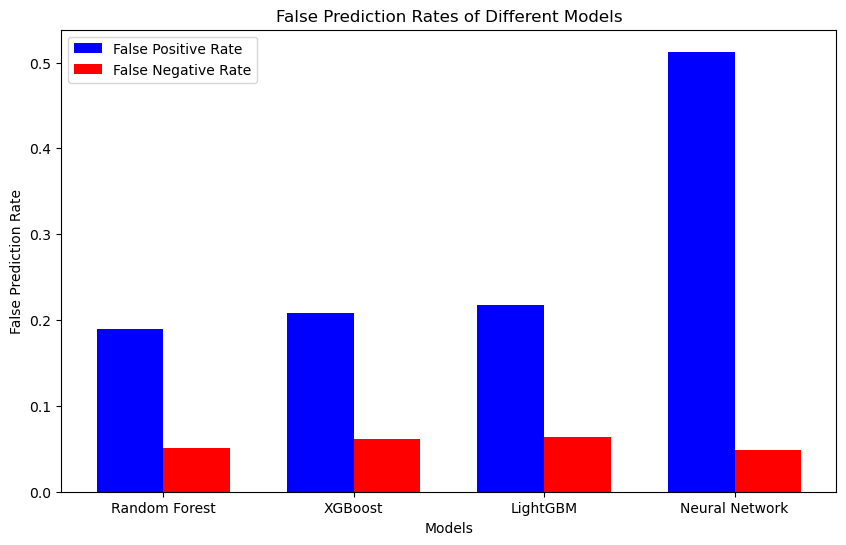

In [ ]:
# Define function to calculate false prediction rates
def false_prediction_rates(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
    return fpr, fnr

# Calculate false prediction rates for each model
rf_fpr, rf_fnr = false_prediction_rates(rf_conf_matrix)
xgb_fpr, xgb_fnr = false_prediction_rates(xgb_conf_matrix)
lgbm_fpr, lgbm_fnr = false_prediction_rates(lgbm_conf_matrix)
nn_fpr, nn_fnr = false_prediction_rates(nn_conf_matrix)

# Plot false prediction rates using bar plot
models = ['Random Forest', 'XGBoost', 'LightGBM', 'Neural Network']
fpr_values = [rf_fpr, xgb_fpr, lgbm_fpr, nn_fpr]
fnr_values = [rf_fnr, xgb_fnr, lgbm_fnr, nn_fnr]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, fpr_values, bar_width, label='False Positive Rate', color='b')
plt.bar(index + bar_width, fnr_values, bar_width, label='False Negative Rate', color='r')

plt.xlabel('Models')
plt.ylabel('False Prediction Rate')
plt.title('False Prediction Rates of Different Models')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()
